In [1]:
# Homework Assignement Topic: Linear Regression

### In this assignment a data set of a collection of cars, (mtcars) will be used to explore the relationship between a set of variables and miles per gallon (MPG) and will attempt to create a linear regression model of fuel economy (mpg) for providing a informed decision on which car to buy.

#### Dataset: The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973--74 models). You will be provided the data set along with this file. 

# Student Name: Man Nguyen Duc

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [5]:
data= pd.read_csv('mtcars.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [7]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


#### 1. Create separate plots of the mpg (miles per gallon) as the response, against each of disp, cyl and wt. Calculate the correlation between mpg and the three variables. Based on the correlation and plots, comment on which of these predictors seems most important?

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Engine Displacement (disp)')

Text(0, 0.5, 'Miles per Gallon (mpg)')

Text(0.5, 1.0, 'Mpg vs. Disp')

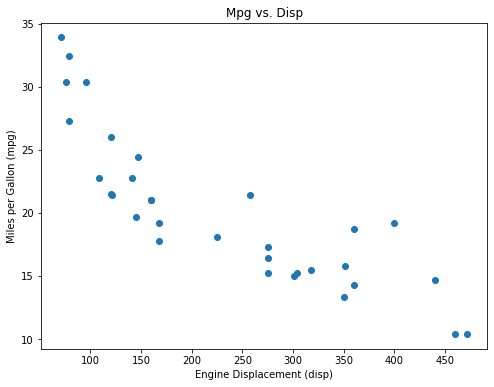

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Number of Cylinders (cyl)')

Text(0, 0.5, 'Miles per Gallon (mpg)')

Text(0.5, 1.0, 'Mpg vs. Cyl')

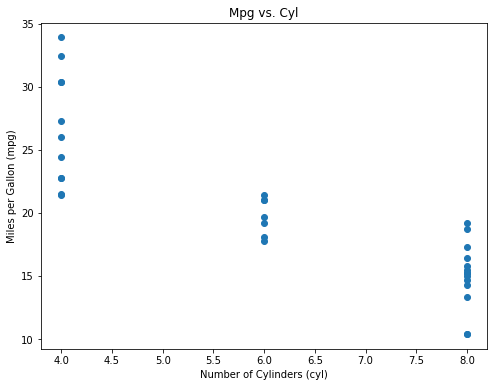

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Vehicle Weight (wt)')

Text(0, 0.5, 'Miles per Gallon (mpg)')

Text(0.5, 1.0, 'Mpg vs. Wt')

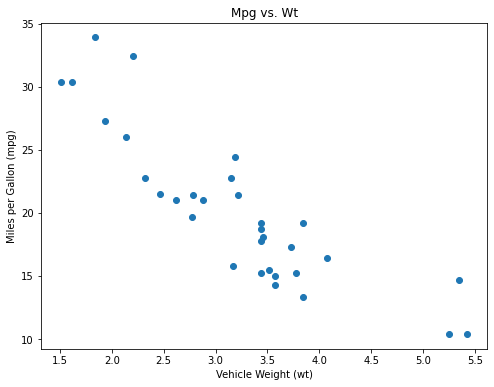

In [9]:
# My code Solution
# Extract the variables
mpg = data['mpg']
disp = data['disp']
cyl = data['cyl']
wt = data['wt']

# Create separate plots

# Plot 1: mpg vs. disp
plt.figure(figsize=(8, 6))
plt.scatter(disp, mpg)
plt.xlabel('Engine Displacement (disp)')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Mpg vs. Disp')
plt.show()

# Plot 2: mpg vs. cyl
plt.figure(figsize=(8, 6))
plt.scatter(cyl, mpg)
plt.xlabel('Number of Cylinders (cyl)')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Mpg vs. Cyl')
plt.show()

# Plot 3: mpg vs. wt
plt.figure(figsize=(8, 6))
plt.scatter(wt, mpg)
plt.xlabel('Vehicle Weight (wt)')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Mpg vs. Wt')
plt.show()


In [10]:
# My Solution written solution here

# Calculate the correlation coefficients
corr_disp = mpg.corr(disp)
corr_cyl = mpg.corr(cyl)
corr_wt = mpg.corr(wt)

# Print the correlation coefficients
print("Correlation between mpg and disp:", corr_disp)
print("Correlation between mpg and cyl:", corr_cyl)
print("Correlation between mpg and wt:", corr_wt)


Correlation between mpg and disp: -0.8475513792624785
Correlation between mpg and cyl: -0.8521619594266132
Correlation between mpg and wt: -0.8676593765172279


####  2. Create a linear regression model that uses mpg as the response and the most correlated variable from (1) as predictor. Print out the summary result and answer the following:
 - what is the overall null hypothesis and what is the associated p-value? what do you conclude about H0?
 - What is the coefficient value and the 95% confidence interval on the coefficient associated with the predictor variable?
Be quantitative and specific.


In [17]:
#My code here
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# Create the linear regression model
regression_model = LinearRegression()

# Extract the variables
mpg = data['mpg']
wt = data['wt']

# Add a constant column to the predictor variable
X = sm.add_constant(wt)

# Create the linear regression model
model = sm.OLS(mpg, X)

# Fit the linear regression model
results = model.fit()

# Print the summary result
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           1.29e-10
Time:                        06:11:11   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.0

3. Again using the mtcars data, create a linear regression model that uses mpg as the response and both disp and wt score as predictors. Print out the summary result and compare with the results in (2). Based on the multivariate model:
 - Which predictor variables are significant and how did you determine this?
 - What are two assumptions one make's about residuals?
 - Create a plot of the residuals versus fitted values. Does the plot suggest that are assumptions are met? Why or why not?


In [18]:
#My code here
# Extract the variables
mpg = data['mpg']
disp = data['disp']
wt = data['wt']

# Add a constant column to the predictors
X = sm.add_constant(pd.concat([disp, wt], axis=1))

# Create the linear regression model
model = sm.OLS(mpg, X)

# Fit the linear regression model
results = model.fit()

# Print the summary result
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     51.69
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           2.74e-10
Time:                        06:15:51   Log-Likelihood:                -78.084
No. Observations:                  32   AIC:                             162.2
Df Residuals:                      29   BIC:                             166.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9606      2.165     16.151      0.0

#my written solution here

Which predictor variables are significant and how did you determine this?

To determine the significance of predictor variables, we can examine the p-values associated with each predictor variable.
In the summary result, look for the "P>|t|" column. The p-values represent the significance of each predictor variable.
If the p-value is less than a chosen significance level (e.g., 0.05), we consider the variable to be significant.
In the printed summary result, locate the rows corresponding to the predictor variables (disp and wt). If the p-values for these variables are less than 0.05, we can conclude that they are significant predictors of mpg.

What are two assumptions one makes about residuals?

Two assumptions about residuals in linear regression are: a. The residuals are normally distributed: This assumption implies that the residuals should follow a normal distribution with a mean of zero. b. The residuals have constant variance (homoscedasticity): This assumption suggests that the variability of the residuals should be consistent across all levels of the predictors.

Create a plot of the residuals versus fitted values. Does the plot suggest that assumptions are met? Why or why not?

To create a plot of residuals versus fitted values, we can use the plot_regress_exog() function from the statsmodels.graphics.regressionplots module.


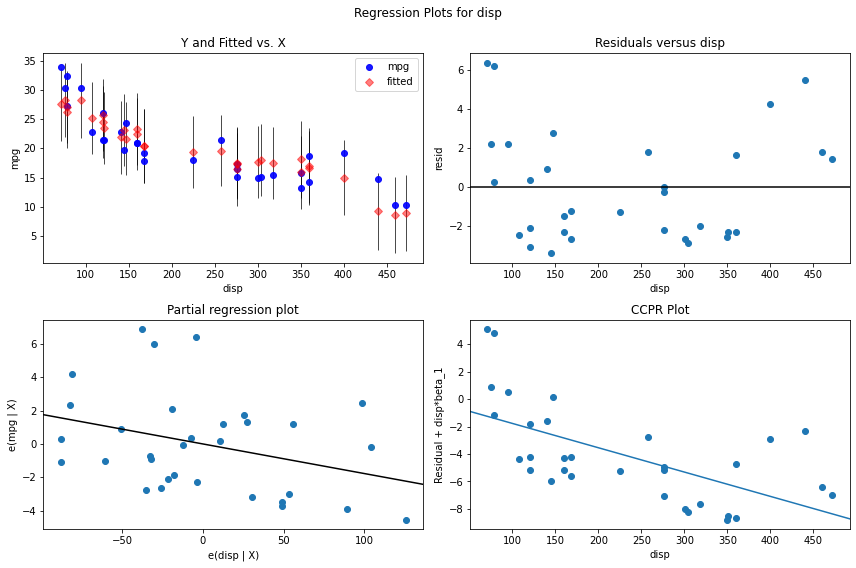

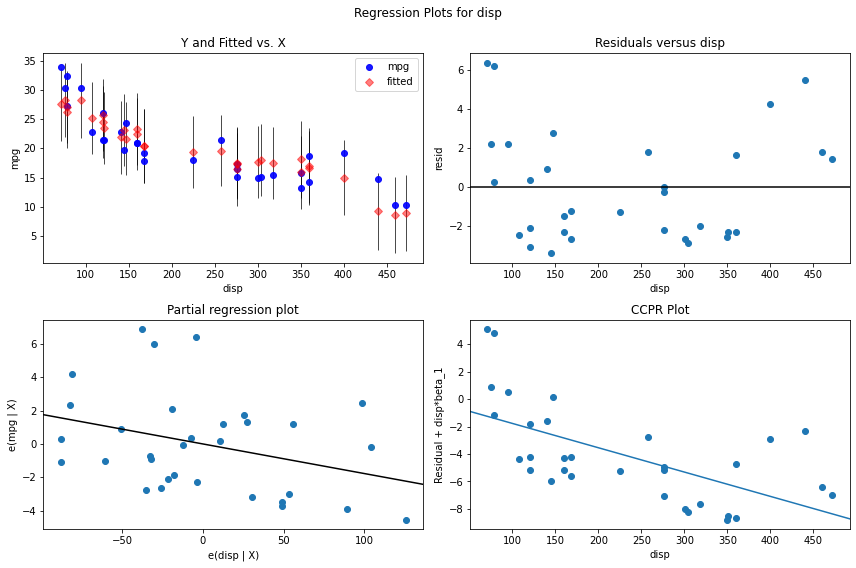

In [19]:
# Here's the code to create the plot:
from statsmodels.graphics.regressionplots import plot_regress_exog

# Create the plot
fig = plt.figure(figsize=(12, 8))
plot_regress_exog(results, 1, fig=fig)

# Show the plot
plt.show()

#### 4. Now use the prediction model from the problem (3) above, predict the average mpg for a car with a weight of 3500 lbs and a displacement of 200 cu in.?

In [20]:
#my code here
# Define the predictor values for the new car
new_car_wt = 3500
new_car_disp = 200

# Create a DataFrame with the predictor values
new_car_data = pd.DataFrame({'const': 1, 'wt': new_car_wt, 'disp': new_car_disp}, index=[0])

# Predict the average mpg for the new car
predicted_mpg = results.predict(new_car_data)

# Print the predicted mpg
print("Predicted average mpg for the car: {:.2f}".format(predicted_mpg[0]))


Predicted average mpg for the car: -697.24


#### 5. Consider cyl as an additional predictor for the above model in problem (3):

 - Create a plot of the number of cylinders, cyl as a predictor against mpg. Is cyl an important predictor?
 - Create a new model that uses cyl as an additional predictor variable (along with disp and wt) and print out summary result.
 - What does the cyl coefficient represent? Is cyl a continuous or categorical predictor? 
 - Does including cyl improve model fit? How would you know?

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Number of Cylinders (cyl)')

Text(0, 0.5, 'Miles per Gallon (mpg)')

Text(0.5, 1.0, 'Mpg vs. Cyl')

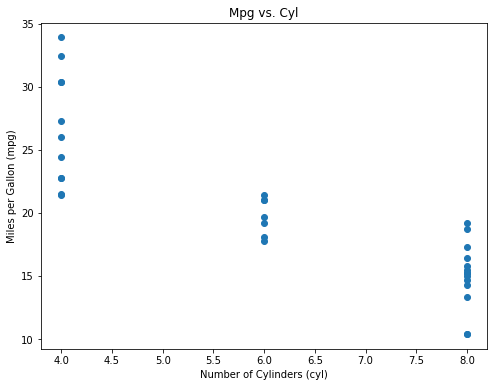

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     46.42
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           5.40e-11
Time:                        06:26:38   Log-Likelihood:                -73.779
No. Observations:                  32   AIC:                             155.6
Df Residuals:                      28   BIC:                             161.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.1077      2.842     14.462      0.0

In [21]:
#My code here

import matplotlib.pyplot as plt

# Create a scatter plot of cyl against mpg
plt.figure(figsize=(8, 6))
plt.scatter(cyl, mpg)
plt.xlabel('Number of Cylinders (cyl)')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Mpg vs. Cyl')
plt.show()

# Add a constant column and create the predictors DataFrame
X = sm.add_constant(pd.concat([disp, wt, cyl], axis=1))

# Create the linear regression model
model = sm.OLS(mpg, X)

# Fit the linear regression model
results = model.fit()

# Print the summary result
print(results.summary())



#My written solution here
What does the cyl coefficient represent? Is cyl a continuous or categorical predictor?

The cyl coefficient represents the estimated effect of the number of cylinders (cyl) on the response variable (mpg) in the linear regression model.
Since cyl is a variable representing the number of cylinders, it is a categorical predictor. In this dataset, the variable cyl takes on discrete values representing the number of cylinders in a car (e.g., 4, 6, or 8).


Does including cyl improve model fit? How would you know?

To assess whether including cyl improves the model fit, we can compare the model fit statistics, such as the adjusted R-squared value, between the models with and without cyl.
The adjusted R-squared value accounts for the number of predictors and the sample size, providing a measure of the proportion of the variation in the response variable explained by the predictors.
